In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import pandas as pd

In [ ]:
#Constants
N = 2
mu_m = 0.011
mu_s = 0.00016
g = 9.81
L = 0.22
Omega = np.sqrt(g/L)
omega = 8.61
beta = 0.0005
x0 = beta*g/(omega**2)
theta0 = 1

In [ ]:
def find_freq(y):
  av_l = np.average(y)
  start = None
  stop = None
  for i in range(1,len(y)-1):
    if (y[i]>av_l and y[i+1]<=av_l) or (y[i]<=av_l and y[i+1]>av_l):
      start = i
      break
  for i in range(start+1,len(y)-1):
    if (y[i]>av_l and y[i+1]<=av_l) or (y[i]<=av_l and y[i+1]>av_l):
      stop = i 
      break
  if (start ==None or stop == None):
    return None
  else :
    return(1/(t[stop]-t[start]))

In [ ]:
def find_peaks(y):
  av_l = np.average(y)
  peaks = []
  for i in range(1,len(y)-1):
    if(y[i]>=y[i-1] and y[i]>=y[i+1]):
      peaks.append(y[i])
  peaks = np.array(peaks)
  peaks = peaks - np.ones(len(peaks))*av_l
  return peaks

In [ ]:
def Amplitude(y):
   peaks = find_peaks(y)
   return np.average(peaks[-10:])

In [ ]:
phis = np.zeros(N)
phisdot = np.zeros(N)
def odes(z, t):
    PHI = z[0]
    PHI_dot = z[1]
    for j,i in enumerate(range(0,2*N,2)):
      phis[j] = z[i+2]
      phisdot[j] = z[i+3]
    # D = (1/omega)*((phis/theta0)**2 - 1)
    D = ((phis/theta0)**2 - 1)
    # 1 equation
    dPHIdt = PHI_dot
    # 1 equation
    # dPHIdotdt = -1*(((Omega**2)*PHI)+(mu_s*PHI_dot)-(x0/((omega**2)*L))*np.sum((np.sin(phis)*phisdot**2) + np.cos(phis)*(np.sin(phis) + mu_m*phisdot*D)))/(1-((x0/(L*Omega**2))*np.sum((np.cos(phis))**2))) 
    dPHIdotdt = ((-Omega**2/omega**2)*PHI-mu_s*PHI_dot+np.sum( np.sin(phis)*phisdot**2 + np.cos(phis)*(np.sin(phis) + mu_m*phisdot*D)))/(1-beta*np.sum(np.cos(phis)**2))
    # N equations
    dphisdt = phisdot.copy()
    # N equations
    # dphisdotdt = -1*(np.sin(phis) + mu_m*phis*D +((omega/Omega)**2)*np.cos(phis)*dPHIdotdt)
    dphisdotdt = -np.sin(phis) - mu_m*phisdot*D - beta*np.cos(phis)*dPHIdotdt
    final = [dPHIdt,dPHIdotdt]
    for i in range(len(dphisdotdt)):
      final.append(dphisdt[i])
      final.append(dphisdotdt[i])
    final = np.array(final)
    return final

In [ ]:
# z0 = [0,0]
# for i in range(N):
#   z0.append(-1*2*theta0)
#   z0.append(0)
z0 = [0,0,2,2,0.5,0.5]
t = np.linspace(0 ,1000, 10000)
z0 = odeint(odes, z0, t)

PHI = z0[:,0]
PHI_dot = z0[:,1]

phis = phis.tolist()
phisdot = phisdot.tolist()

for i in range(N):
    phis[i] = z0[:,2*i+2]
    phisdot[i] = z0[:,2*i+3]

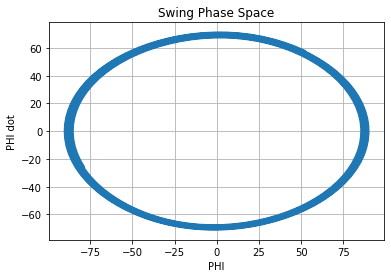

In [ ]:
last = 1000

plt.plot(PHI[-last:],PHI_dot[-last:])
plt.xlabel('PHI')
plt.ylabel('PHI dot')
plt.title('Swing Phase Space')
plt.grid()
plt.show()

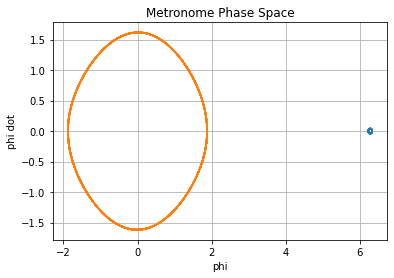

In [ ]:
last2 = 1000

for i in range(N):
  plt.plot(phis[i][-last2:],phisdot[i][-last2:])
plt.xlabel('phi')
plt.ylabel('phi dot')
plt.title('Metronome Phase Space')
# plt.xlim(-0.2,0.2)
# plt.ylim(-0.15,0.15)
plt.grid()
plt.show()

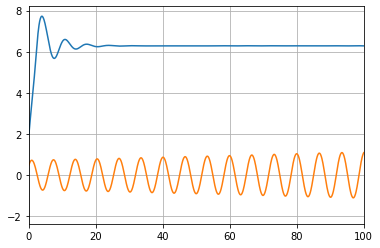

In [ ]:
for i in range(N):
  plt.plot(t,phis[i])
plt.xlim(0,100)
plt.grid()
plt.show()

In [ ]:
data = []
for i in range(N):
  data.append({'Frequency of the Metronome':find_freq(phis[i]),'Amplitude of the Metronome':Amplitude(phis[i])})
df = pd.DataFrame(data, index=[i+1 for i in range(N)])
df

,Frequency of the Metronome,Amplitude of the Metronome
1,0.263132,0.055392
2,0.303000,1.877504


In [ ]:
(-11 - np.sqrt(121 + 20*852))/10

-14.2